## Problem 1: Numerical Instability

a.) 4 points
The *n dimensional Hilbert matrix* is a matrix $H_n$ whose $(i,j)$ entry equals $\frac{1}{i+j-1}$. For example, $H_3$ equals 
$$
\begin{pmatrix}
1&1/2&1/3\\
1/2&1/3&1/4\\
1/3&1/4&1/5
\end{pmatrix}.
$$
The scipy stack has functions `hilbert()` and `invhilbert()` which creates a floating point approximation of Hilbert matrices and their inverses:

In [1]:
# This creates the 20x20 Hilbert and inverse Hilbert matrices 
from scipy.linalg import hilbert, invhilbert
A = hilbert(20)
B = invhilbert(20)

The following code cell computes the matrix product $AB$ and prints the first row. In the markdown cell below it, explain what is "wrong," and what the first row *should have been*. Why was the printed row so different than what should have been printed?

In [2]:
import numpy
product = numpy.matmul(A,B)
#show(list(product[0]))
show(product[0,:])

array([ 1.00437545e+00, -2.27042112e+00,  4.32962608e+02, -2.36998906e+04,
        6.51998838e+04, -2.82107225e+06,  2.66416605e+07, -2.27845716e+07,
        1.02696248e+09, -3.65666964e+09,  4.22748993e+09,  2.67330800e+09,
        2.90846193e+10,  2.36852236e+10,  1.02398542e+11, -7.50939541e+08,
        1.32523706e+10,  1.11356300e+10,  3.15804685e+08, -1.83050996e+08])

The first row was printed as a python list, not a numpy array, but that is not what is wrong. What is wrong is when a matrix is multiplied by it's inverse, you should get the identity matrix with the same number of rows and columns. So the first row should have been a 1 with 19 zeroes following it. The row was different most likely because numpy used floating point arithmetic and approximated the fractions into decimals, which messed up the entire calculation because exact values were not returned. 

b.) 4 pts

Write a function `sageHilb` which
- Takes as input a positive integer $n$
- Returns a Sage matrix of the $n$th Hilbert matrix with *rational entries* (not floats!) 

Do not use any built in functions here! One way to do this by hand is to start by making an $n\times n$ matrix of just zeroes. Then using a double for loop, iterate over the rows and columns and update each position according to the formula for the Hilbert matrix.

In [3]:
def sageHilb(n):
    M = matrix(QQ, n, n)
    for i in range(M.nrows()):
        for j in range(M.ncols()):
            M[i,j] = (1/((i+1) + (j+1) -1))
    return(M)

Run this code cell to check your answer:

In [4]:
M = sageHilb(3)
show(M)

[  1 1/2 1/3]
[1/2 1/3 1/4]
[1/3 1/4 1/5]

c.) 2 pts

Run the code cell below to recreate the calculation from 1a.) using your `sageHilb` function. Why is this version of the calculation so much more accurate?

In [5]:
A = sageHilb(20)
B = sageHilb(20)^(-1)
product = A*B
show(product[0])
show(A)
print("This version is much more accurate because NumPy uses floating point arithmetic, and estimates these fractions to a bunch of decimal points, while SageMath does symbolic and exact calculations.")

(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

20 x 20 dense matrix over Rational Field (use the '.str()' method to see the entries)

This version is much more accurate because NumPy uses floating point arithmetic, and estimates these fractions to a bunch of decimal points, while SageMath does symbolic and exact calculations.


## Problem 2: Image Compression
This problem is an introduction to image manipulation and compression in Python.
The code below imports a photo of the famous Mona Lisa painting, and stores the photo data into a NumPy array.

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('MonaLisa.png')    #Read in the file
monaLisa = np.array(image)[:,:,:3]    #Convert the file to a numpy array

Run the code cell below to recreate the photo in your Jupyter Notebook (you do not have to worry about the syntax here):

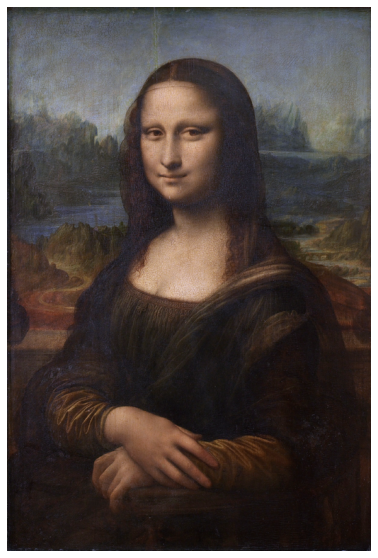

In [4]:
photo = plt.figure(figsize = (10,10)) # create a 10 x 10 figure 
mona = photo.add_subplot(111) #Add a frame for Mona into the figure
mona.imshow(monaLisa)         #Add Mona into her frame
mona.axis('off')              #Remove axes from the plot
plt.show()                    #Show the plot

a.) 2 pts

Running the code cell below, we can see that the data is being stored in a numpy array of shape $(768,514,3)$. What do the dimensions $768$, $514$, and $3$ represent? Hint: https://en.wikipedia.org/wiki/RGB_color_model . For another hint, go to the plot cell above and comment out the `mona.axis('off')` command.

In [8]:
monaLisa.shape

(768, 514, 3)

This means 768 rows, 514 columns, and 3 different (RGB) colors. 

b.) 4 pts

Write a function `compressSVD(matrix, k)` which
- Takes as input a 2 dimensional numpy array `matrix` and a positive integer `k`
- Performs svd on `matrix` using the builtin `linalg.svd` function (I have already added the necessary import statements)
- Retains the information related to the largest `k` singular values in the svd and returns the corresponding inverse transform

In other words, if our matrix is $M$ and the singular value decomposition of $M$ is given by 
$$
M = U\Sigma V^T,
$$
then you should return the product 
$$
M_k = U_k \Sigma_k V_k^T
$$
where $U_k$ consists of the first $k$ columns of $U$ (in order), $\Sigma_k$ is a diagonal matrix whose values are the largest $k$ singular values of $M$ (in order), and $V_k^T$ consists of the first $k$ rows of $V^T$ (in order). Hint: Look at the end of Lecture 8 for a special case of this.


In [5]:
from numpy import linalg
def compressSVD(matrix, k):
    U, S, VT = linalg.svd(matrix)
    Uk, Sk, VTk = U[:,:k], np.diag(S[:k]), VT[:k]
    return np.matmul(Uk, np.matmul(Sk, VTk))

c.) 2 pt

The `compressPhoto` function below uses your `compressSVD` function to compress the Mona Lisa photo by individually compressing the individual color intensities and then recombining them. Beneath the function definition I have copied the code to display the compressed photos. By playing around with various values of $k$, $1\leq k\leq 514$, find a "small" value of $k$ for which you cannot identify a difference between your compressed photo and the original photo; display the compressed photo for that value of $k$. Obviously everyone's value of $k$ will be different as it depends on your visual acuity. This is mainly just a cool thing that you can play around with to actually see how the compression is working.

*PLEASE DO NOT* show all the plots that you experimented with for varying values of $k$ in separate code cells; having a bunch of plots of Mona Lisa at varying resolutions will be a pain during grading. Only use the code cell below, and tinker with the value of $k$ by hand. Once you have found a "good" choice of $k$, please only display the corresponding plot for that value of $k$.

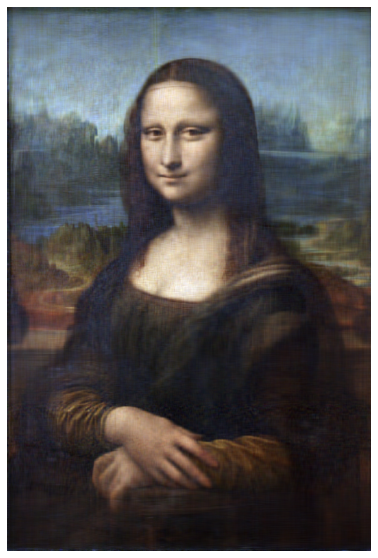

In [9]:
def compressPhoto(matrix, k):
    red, green, blue = compressSVD(matrix[:,:,0],k), compressSVD(matrix[:,:,1],k), compressSVD(matrix[:,:,2],k)
    for color in [red,green,blue]:
        color -= color.min()
        color /= color.max()
    Z = np.zeros((768,514,3))
    Z[:,:,0],Z[:,:,1],Z[:,:,2]= red,green,blue
    return(Z)

compressedMona = compressPhoto(monaLisa, k=50)    #<-------------- This is the only line that needs to be modified for this problem! Everything else is done for you! Right now $k$ is set to 514, the max value

fig2 = plt.figure(figsize = (10,10)) 
ax3 = fig2.add_subplot(111)
ax3.imshow(compressedMona)
ax3.axis('off')
plt.show()
#I start to notice a real difference around k = 50

d.) 2 points

Let $M$ be a matrix with SVD $M = U\Sigma V^T$. If $M$ has $r$ rows and $c$ columns, There are $r*c$ numbers in that matrix. Recall from 2b.) the notation of the truncated SVD, $M_k = U_k\Sigma_k V_k^T$. As a function of $r,$ $c$, and $k$, how many numbers are required to store the information of $U_k, \Sigma_k$, and $V_k^T$?

For the Mona Lisa image, we stored $3$ matrices corresponding to different color intensities. The individual matrices had $768$ rows and $514$ columns, so in total we had to store $768*514*3=1,184,256$ numbers in total. For the value of $k$ that you selected in 2c.), how many numbers did you have to store in the compressed version? (Just use your answer to the first part of this question and plug in the specific values of $r$, $c$, and $k$ to get the information for a single matrix, and then multiply by $3$ to account for the different colors).

I stored ((768 * 50)+(50 * 50)+(514 * 50)) * 3 = 199800 numbers. 

## Problem 3: Multivariate Calculus: Gradient Fields

A *vector field* on $\mathbb{R}^2$ is a function $F:\mathbb{R}^2\to\mathbb{R}^2$. You can instantiate a vector field in Sage symbolically using the syntax
```
F(x,y) = (f_1(x,y),f_2(x,y))
```
where `f_1` and `f_2` are two symbolic functions $\mathbb{R}^2\to\mathbb{R}$. 

2a.) 2 pts

Below I have defined a symbolic function `f` which depends on the variables `x` and `y`. Using Sage's builtin function, compute and display the gradient of $f$. Gradients form a special class of vector fields!

In [11]:
var('x','y')
f(x,y) = e^(x*y) - sin(x-y) + x^2
gradfield = f.gradient()
show(gradfield)

(x, y) |--> (y*e^(x*y) + 2*x - cos(x - y), x*e^(x*y) + cos(x - y))

b.) 4 pts

Plot the vector field corresponding to the gradient of `f`. Use the ranges $-2\leq x\leq 2$ and $-2\leq y\leq 2$. Hint: you will use the `plot_vector_field` command. Use introspection or look through the documentation to figure out the parameters.

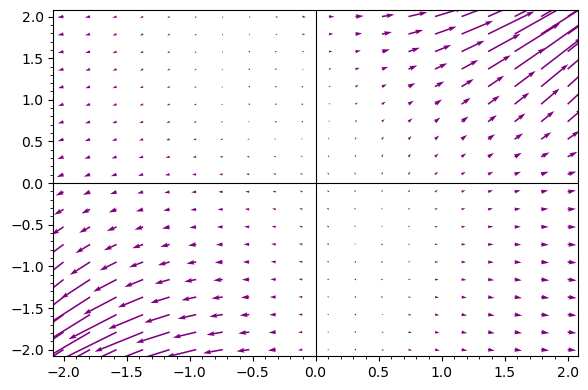

In [12]:
plot_vector_field(gradfield, xrange = [-2,2], yrange = [-2,2], color = "purple")

c.) 4 pts

Plot the vector field `F(x,y) = (-y, x)` on the same domain, $-2\leq x\leq 2$ and $-2\leq y\leq 2$. You don't have to write anything down for this, but do you notice anything different? You should see that this one is a bit more whirly twirly, whereas following the arrows in the previous plot always led "to infinity". This is in some sense a visual depiction of *curl* in the vector field. The presence of curl tells you that in fact there is no function with gradient given by this vector field, `F(x,y) = (-y,x)`. Pretty cool!

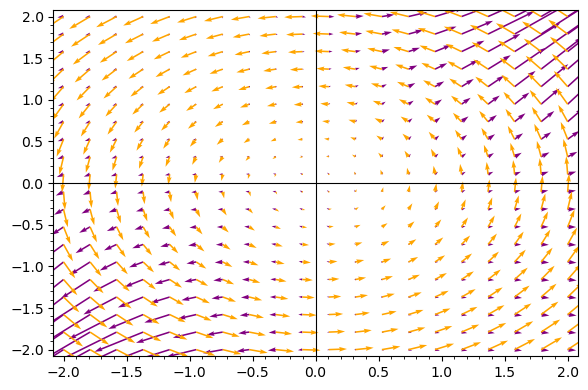

In [13]:
F(x,y) = (-y,x)
Plotty = plot_vector_field(gradfield, xrange = [-2,2], yrange = [-2,2], color = "purple")
Plotty += plot_vector_field(F, xrange = [-2,2], yrange = [-2,2], color = "orange")
show(Plotty)

## Problem 4: Some Theorems from Linear Algebra
In this question you will be using Sage to verify some theorems from linear algebra in specific instances.

For each of part of this question, you do not need to add any text "explaining" your answers, but you need to add enough print statements so that the results are "obvious" from the output of your code. There are many builtin functions which allow these questions to be done quite quickly; I recommend using them. You can search for methods to calculate characteristic polynomials, eigenvalues/eigenvalues, etc. here: https://doc.sagemath.org/html/en/constructions/linear_algebra.html

a.) 3 pts

The Cayley Hamilton Theorem states that any matrix satisfies its own characteristic polynomial. In the code cell below I have instantiated a matrix `M`. Print the characteristic polynomial `p(x)` of `M` and print the result of evaluating `p(x)` at `M` to verify that the Cayley Hamilton Theorem is true in this specific instance.

In [10]:
M = matrix([[3,1,3,-5],[0,1,2,-1],[4,4,1,0],[1,1,1,1]])
chp = M.charpoly()
show(M)
show(chp)
show(chp(M))

[ 3  1  3 -5]
[ 0  1  2 -1]
[ 4  4  1  0]
[ 1  1  1  1]

x^4 - 6*x^3 - 2*x^2 + 49*x - 46

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

b.) 4 pts

The Perron Frobenius Theorem states that if a square $n\times n$ matrix $M$ has positive real entries, then (among other things)
- $M$ has a positive real eigenvalue $r$.
- The corresponding eigenvector of $r$ can be chosen to have strictly positive entries.
- If the entry of $M$ in the $i$th row and $j$th column is labeled $m_{i,j}$, then 
$$
\min_{1\leq i \leq n}\sum_{1\leq j\leq n}m_{i,j} \leq r \leq \max_{1\leq i \leq n}m_{i,j} \sum_{1\leq j\leq n} m_{i,j}.
$$

In the code cell below I have instantiated a matrix `M` with positive real entries. Find the eigenvalue $r$ that the Perron Frobenius Theorem is talking about for `M`. Verify that the three statements  above hold for this choice of $r$ and `M`.

In [11]:
M = matrix([[3,3],[5,1]])
show(M.eigenvectors_right())
print("There is an eigenvalue lambda = 6 with eigenvector (1,1). The sum of both rows also equals to 6, so the thereom is verified.")

[(6,
  [
  (1, 1)
  ],
  1),
 (-2,
  [
  (1, -5/3)
  ],
  1)]

There is an eigenvalue lambda = 6 with eigenvector (1,1). The sum of both rows also equals to 6, so the thereom is verified.


c.) 3 pts

If `M` is any square matrix, then 
- The eigenvalues of `M` equal the eigenvalues of `M^T`, where `M^T` is the transpose matrix.
- If `M` is invertible and if $\lambda$ is an eigenvalue of `M` then $1/\lambda$ is an eigenvalue of the inverse matrix `M^-1`

Below I have instantiated a matrix `M`. Verify that `M` is invertible, and then verify the two statements above regarding `M`, `M^T`, and `M^-1`.

In [16]:
M = matrix([[-3,0,-1],[1,-4,2],[1,0,2]])
if det(M) != 0:
    print("True")
if set(M.eigenvalues()) == set(M.T.eigenvalues()):
    print("True")
print(all([eig^(-1) in (M^-1).eigenvalues() for eig in M.eigenvalues()]))


#This right here was just me seeing if I could have done this problem with booleans. 
z = bool(set(M.eigenvalues()) == set(M.T.eigenvalues()))
print(z)

True
True
True
True


## Problem 5: Conjecture and Proof: The Fibonacci Numbers Revisited

Recall the Fibonacci numbers, defined by 
$$
f_0 = f_1 = 1, \;\; f_n = f_{n-1}+f_{n-2}\text{ for }n\geq 2.
$$
It is often convenient to simply define $f_n = 0$ for any $n<0$. (WARNING: As you move into other classes, some people may prefer different indexing, such as $f_0=0$, $f_1=1,f_2=1$, etc. Just be aware of that, as it changes some of the theorem statements in an unimportant but still apparent way).

The first few Fibonacci numbers are $f_0=1,f_1=1,f_2=2,f_3=3,f_4=5,f_5=8,f_6=13$.

a.) 2 pts

Below I have defined a matrix $F$. Print the first 5 powers of $F$ (i.e. $F$, $F^2$, $F^3$, $F^4$, $F^5$) and then make a conjecture regarding the general form of $F^n$ for any $n\geq 1$. You *do not need to prove or justify your conjecture*, although it is not hard to do so using induction. Please format your conjecture using LaTex; you can see how to write a matrix in LaTex from Problem 1a.).

In [18]:
F = matrix([[1,1],[1,0]])
for i in range (1,6):
    show(F^i,"\n")

[1 1]
[1 0] '\n'

[2 1]
[1 1] '\n'

[3 2]
[2 1] '\n'

[5 3]
[3 2] '\n'

[8 5]
[5 3] '\n'

The top left number is the nth Fibonacci number, the top right and bottom left numbers are (n-1)st Fibonacci numbers, and the bottom right number is the (n-2)nd Fibonacci number.Also, the matrix ([1,1],[1,0])^n is equivalent to Fn. 

b.) 4 pts

Assume your conjecture in 5a.) is correct. Use that formula to derive the *Cassini identity*, which states that for $n\geq 1$,
$$
f_{n}f_{n-2} - f_{n-1}^2 = (-1)^n.
$$
For example, $f_4 = 5,f_5 = 8, f_6 = 13$, and 
$$
13\cdot 5 - 8^2 = 65 - 64 = 1 = (-1)^6.
$$
Hint: Relate the expression $f_{n}f_{n-2} - f_{n-1}^2$ to a property of your matrix $F^n$. Your proof can fit into one or two sentences.

The expression $f_{n}f_{n-2} - f_{n-1}^2$ is the determinant of matrix $F^n$. Since the matrix ([1,1],[1,0])^n is equivalent to Fn, we can take the determinant of that matrix and find that it is equal to $(-1)^n$, thus proving the Cassini identity. 

c.) 4 pts

As in the previous part, assume your conjecture in part a.) is true. Use this to derive the identity 

$$
f_nf_m + f_{n-1}f_{m-1} = f_{m+n}.
$$
As a special case, show $f_{2n} = f_n^2 + f_{n-1}^2$.

For example, $f_4 = 5, f_5 = 8, f_6 = 13, f_{11} = 144$, and 
$$
8\cdot 13 + 5 \cdot 8 =104 + 40 = 144.
$$

Hint: Matrix multiplication is associative, so $F^n\cdot F^m = F^{n+m}$. As with part b.), this only needs a couple lines to prove.

Multiplying $F^n\cdot F^m$ yields $f_nf_m + f_{n-1}f_{m-1}$ in the top left entry. The matrix $F^{n+m}$ has a top left entry of $f_{m+n}$. Since matrix multiplication is associative, we know $F^n\cdot F^m = F^{n+m}$, so their top left entries must be the same, and it is shown that $f_nf_m + f_{n-1}f_{m-1} = f_{m+n}$. For the special case, we perform the same operation, instead we simply multiply $F^n\cdot F^n$, or equivalently we can say that we set $n=m$. This will yield the result that $f_{2n} = f_n^2 + f_{n-1}^2$ (these are the top left entries).  